<h1>Pemberi Pinjaman (Multifinance)</h1>

<b>Konteks</b> <br>
Sebagai Data Scientist di ID/X Partners, salah satu tanggung jawab utama saya adalah mengembangkan model machine learning yang efektif untuk memprediksi risiko kredit. Model ini bertujuan untuk menganalisis dan memproses dataset yang terdiri dari data pinjaman yang disetujui dan ditolak, sehingga dapat memberikan wawasan mendalam mengenai faktor-faktor yang memengaruhi kemungkinan pengembalian pinjaman. Dengan pendekatan yang berbasis data ini, kami berusaha untuk meningkatkan akurasi penilaian kredit, mengurangi risiko kerugian, dan pada akhirnya meningkatkan keberhasilan portofolio pinjaman.

<h2>Data Understanding</h2>

<h3>Pertama - Identifikasi Data</h3></br>
Langkah awal yang dilakukan adalah mengidentifikasi data, menentukan variabel dependen (target) dengan independen (bebas) dan memeriksa apakah dalam data tersebut sudah bersih atau masih ada data yang kosong.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
#Membaca Data
df = pd.read_csv('loan_data_2007_2014.csv')
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_6772\1596012604.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Menampilkan informasi tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
#Mendeteksi baris yang kosong
df.isna().sum()

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [5]:
#Mendeteksi duplikasi baris
df[df.duplicated()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m


In [6]:
unique_loan_status = df['loan_status'].unique()
print(unique_loan_status)

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']


Setelah data diperiksa, ada beberapa temuan yang didapatkan diantaranya sebagai berikut:<br>
1. <b>Variabel Dependen</b> dari data tersebut adalah loan_status dimana dibagi dalam 5 kategori sebagai berikut:
   - Status "Fully Paid" dan "Does not meet the credit policy. Status:Fully Paid" masuk dalam kategori <b>'Fully Paid'</b><br>
   - Status "Charged Off" dan "Does not meet the credit policy. Status:Charged Off" masuk dalam kategori <b>'Charged Off'</b><br>
   - Status "Default" dan "Late (31-120 days)" masuk dalam kategori <b>'High Risk'</b><br>
   - Status "In Grace Period","Late (16-30 days)", dan "Current" masuk dalam kategori <b>'Moderate Risk'</b><br>
   - Status lainnya masuk dalam kategori <b>'Status'</b><br>
3. <b>Variabel Independen</b> dari data tersebut adalah loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_sin,e_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_rec,very_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim<br>
4. Kolom Unnamed: 0, id, member_id, desc, url, zip_code, emp_title, title, next_pymnt_d, annual_inc_joint, dti_joint, verification_status_joint, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, inq_fi, total_cu_tl, inq_last_12m tidak termasuk variabel independen<br>
5. Tipe kolom sudah sesuai<br>
6. Ditemukan baris yang kosong sehingga perlu di atasi, pada tipe kolom numerik akan diisi dengan nilai median sedangkan tipe kolom kategorikal akan diisi dengan modus<br>
7. Tidak ditemukan data yang duplikat<br>

In [3]:
#Membagi loan_status menjadi 5 kategori
def simplify_loan_status(status):
    if status in ["Fully Paid", "Does not meet the credit policy. Status:Fully Paid"]:
        return "Fully Paid"
    elif status in ["Charged Off", "Does not meet the credit policy. Status:Charged Off"]:
        return "Charged Off"
    elif status in ["Default", "Late (31-120 days)"]:
        return "High Risk"
    elif status in ["In Grace Period", "Late (16-30 days)", "Current"]:
        return "Moderate Risk"
    else:
        return status
df["loan_status"] = df["loan_status"].apply(simplify_loan_status)

In [4]:
#Menghapus kolom yang tidak diperlukan
columns_to_drop = [
    "Unnamed: 0", "id", "member_id", "desc", "url", "zip_code", "emp_title",
    "title", "next_pymnt_d", "annual_inc_joint", "dti_joint",
    "verification_status_joint", "open_acc_6m", "open_il_6m", "open_il_12m",
    "open_il_24m", "mths_since_rcnt_il", "total_bal_il", "il_util",
    "open_rv_12m", "open_rv_24m", "max_bal_bc", "all_util", "inq_fi",
    "total_cu_tl", "inq_last_12m"
]
df = df.drop(columns=columns_to_drop, errors="ignore")

In [5]:
# Pisahkan kolom berdasarkan tipe data
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [6]:
# Imputasi untuk kolom numerik (menggunakan median)
numerical_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = numerical_imputer.fit_transform(df[numeric_cols])

In [7]:
# Imputasi untuk kolom kategorikal (menggunakan modus)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

<h3>Kedua - Mendeskripsikan & Mengelompokkan Data</h3><br>
Fungsi dari mendeskripsikan dan mengelompokkan data sangat penting dalam analisis data, terutama dalam konteks pengambilan keputusan yang berbasis data. Hal ini bertujuan untuk memberikan gambaran umum tentang data yang ada, termasuk seberapa besar variabilitas, sebaran, dan tren yang terlihat. Selain itu, untuk memisahkan data ke dalam beberapa kelompok sehingga setiap kelompok memiliki sifat atau karakteristik yang mirip.

In [12]:
#Mendeskripsikan setiap kolom data
round(df.describe(), 2)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,466285.00,...,466285.00,466285.00,466285.00,466285.00,466285.00,466285.0,466285.00,466285.00,466285.00,466285.00
mean,14317.28,14291.80,14222.33,13.83,432.06,73277.29,17.22,0.28,0.80,32.44,...,85.34,8.96,3123.91,0.01,42.18,1.0,0.00,162.99,130171.38,29236.81
std,8286.51,8274.37,8297.64,4.36,243.49,54963.34,7.85,0.80,1.09,14.90,...,552.22,85.49,5554.74,0.11,9.99,0.0,0.07,13482.89,141672.90,34432.64
min,500.00,500.00,0.00,5.42,15.67,1896.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,0.00
25%,8000.00,8000.00,8000.00,10.99,256.69,45000.00,11.36,0.00,0.00,31.00,...,0.00,0.00,312.62,0.00,42.00,1.0,0.00,0.00,33611.00,15000.00
50%,12000.00,12000.00,12000.00,13.66,379.89,63000.00,16.87,0.00,0.00,31.00,...,0.00,0.00,545.96,0.00,42.00,1.0,0.00,0.00,81539.00,22800.00
75%,20000.00,20000.00,19950.00,16.49,566.58,88953.00,22.78,0.00,1.00,31.00,...,0.00,0.00,3187.51,0.00,42.00,1.0,0.00,0.00,184930.00,34300.00
max,35000.00,35000.00,35000.00,26.06,1409.99,7500000.00,39.99,29.00,33.00,188.00,...,33520.27,7002.19,36234.44,20.00,188.00,1.0,5.00,9152545.00,8000078.00,9999999.00


In [13]:
#Mendeskripsikan data kategori
df[categorical_cols].describe(include='all')

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285
unique,2,7,35,11,6,3,91,4,2,14,50,664,2,98,103,1
top,36 months,B,B3,10+ years,MORTGAGE,Verified,Oct-14,Moderate Risk,n,debt_consolidation,CA,Oct-00,f,Jan-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,171057,235875,168055,38782,228590,466276,274195,71450,3703,303005,179996,327741,466285


In [14]:
#Mendeskripsikan data kategori berdasarkan tiap kolom
for col in categorical_cols:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom term:
term
36 months    337953
60 months    128332
Name: count, dtype: int64

Value count kolom grade:
grade
B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: count, dtype: int64

Value count kolom sub_grade:
sub_grade
B3    31686
B4    30505
C1    26953
C2    26740
B2    26610
C3    25317
B5    25252
C4    24105
B1    22876
C5    22178
A5    21757
D1    19261
A4    19045
D2    17046
D3    14916
D4    14099
A3    12568
D5    11566
A2    10956
A1    10541
E1     9033
E2     8669
E3     6976
E4     5992
E5     5087
F1     3940
F2     3001
F3     2708
F4     2067
F5     1513
G1     1109
G2      823
G3      583
G4      422
G5      385
Name: count, dtype: int64

Value count kolom emp_length:
emp_length
10+ years    171057
2 years       41373
3 years       36596
< 1 year      36265
5 years       30774
1 year        29622
4 years       28023
7 years       26180
6 years       26112
8 years       22395
9 years       17888
Name: count, dt

Setelah mendeskripsikan data berdasarkan <b>kategori<b>, didapatkan bahwa:<br>
1. Jumlah customer pada ID/X Partners berjumlah <b>466285</b><br>
2. Mayoritas pinjaman adalah untuk periode <b>36 bulan</b> (337.953 pinjaman) dibandingkan dengan periode <b>60 bulan</b> (128.332 pinjaman) <br>
3. Grade menunjukkan distribusi pinjaman dengan kategori utama <b>B</b> (136.929 pinjaman) dengan sub_grade <b>B3</b> dan <b>B4</b> diikuti oleh <b>C</b> (125.293 pinjaman) sebagai yang paling banyak <br>
4. Mayoritas peminjam memiliki pengalaman kerja <b>lebih dari 10 tahun (10+ years)</b> sebanyak 171.057 peminjam <br>
5. Sebagian besar peminjam memiliki status kepemilikan rumah <b>MORTGAGE</b> (235.875 peminjam) dan <b>RENT</b> (188.473 peminjam) <br>
6. Sebagian besar pinjaman berstatus Moderate Risk (228.590 pinjaman), diikuti oleh Fully Paid (186.727 pinjaman) <br>
7. Pinjaman dengan tujuan <b>debt_consolidation</b> mendominasi (274.195 pinjaman), diikuti oleh <b>credit_card</b> (104.157 pinjaman)<br>
8. Sebagian besar peminjam berasal dari negara bagian <b>CA</b> (71450 pinjaman), diikuti oleh <b>NY</b> (40242 pinjaman) dan <b>TX</b> (36439 pinjaman) <br>

In [15]:
#Mendeskripsikan data numerik
df[numeric_cols].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,...,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.0,466285.000000,4.662850e+05,4.662850e+05,4.662850e+05
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327729e+04,17.218758,0.284661,0.804695,32.437644,...,85.344211,8.961534,3123.913796,0.009082,42.180962,1.0,0.004002,1.629893e+02,1.301714e+05,2.923681e+04
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496334e+04,7.851121,0.797343,1.091583,14.901093,...,552.216084,85.491437,5554.737393,0.108632,9.986385,0.0,0.068635,1.348289e+04,1.416729e+05,3.443264e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,31.000000,...,0.000000,0.000000,312.620000,0.000000,42.000000,1.0,0.000000,0.000000e+00,3.361100e+04,1.500000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,...,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.895300e+04,22.780000,0.000000,1.000000,31.000000,...,0.000000,0.000000,3187.510000,0.000000,42.000000,1.0,0.000000,0.000000e+00,1.849300e+05,3.430000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,...,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


<h2>Exploratory Data Analysis (EDA)</h2>

1. <b> Unvariat Analysis</b> dianalisis dengan 2 plot, yaitu:<br>
    a. <b>Histogram</b> digunakan untuk menampilkan distribusi data numerik.<br>
    b. <b>Countplot</b> digunakan untuk melihat distribusi data kategorikal.<br>
2. <b>Multivariate Analysis</b> dianalisis dengan 4 plot, yaitu:<br>
    a. <b>Heatmap</b> menyediakan representasi visual dari korelasi antara berbagai variabel.<br>
    b. <b>Scatter plot</b> memberikan gambaran menyeluruh mengenai hubungan antara variabel dalam dataset.<br>
    c. <b>Boxplot</b> digunakan untuk menganalisis distribusi data numerik berdasarkan kategori.<br>
    d. <b>Countplot</b> digunakan untuk menganalisis distribusi kategori terhadap target.<br>

<h3>1. Analisis Univariat</h3>

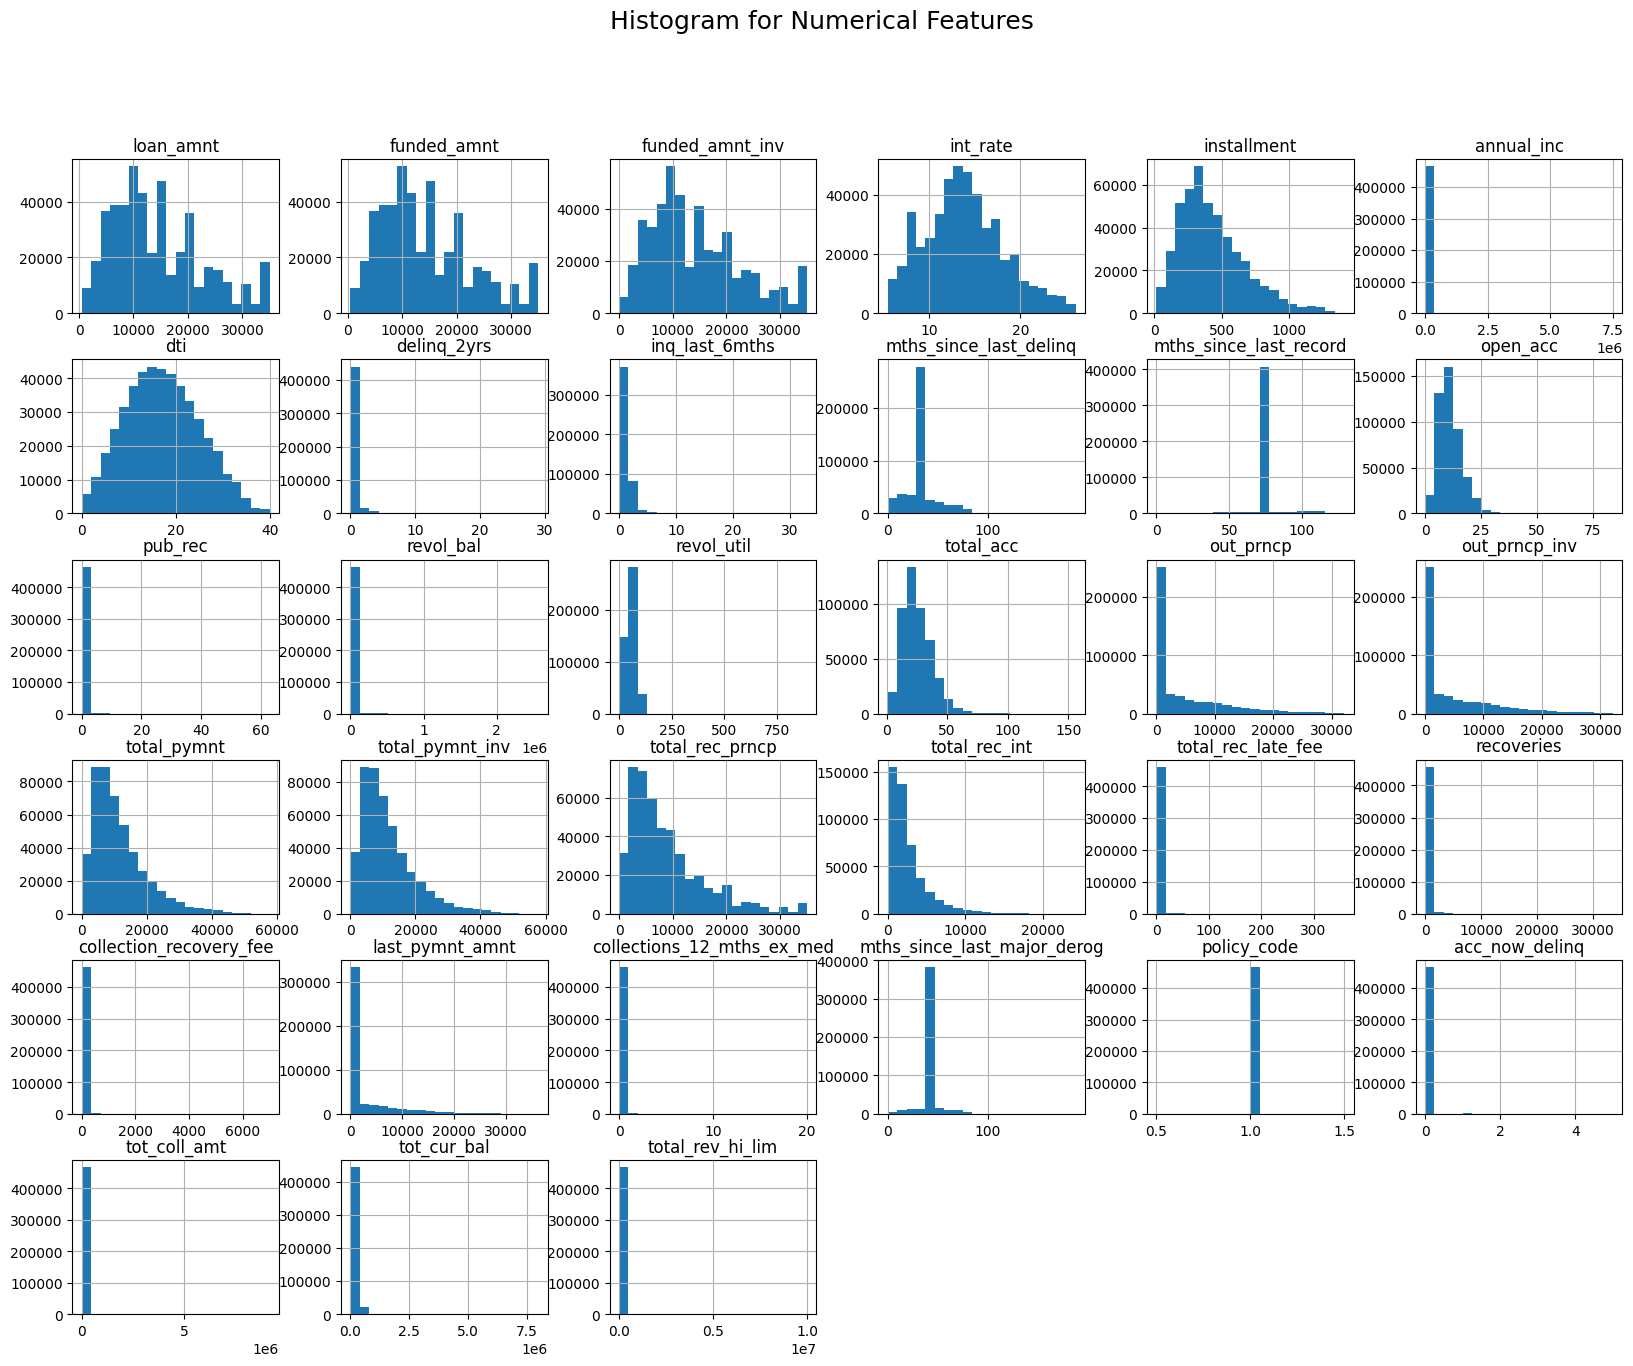

In [16]:
# Histogram for numerical features
df[numeric_cols].hist(bins=20, figsize=(20, 15))
plt.suptitle("Histogram for Numerical Features", size=18)
plt.show()

Grafik histogram menunjukkan:
1. <b>Distribusi Data</b>: Beberapa fitur, seperti loan_amnt, annual_inc, dan int_rate, cenderung memiliki distribusi yang miring (skewed), yang mengindikasikan adanya nilai ekstrim (outlier).<br>
2. <b>Variasi Data</b>: Kolom-kolom loan_amnt dan annual_inc menunjukkan rentang nilai yang sangat luas, dengan nilai tinggi yang menunjukkan adanya peminjam dengan jumlah pinjaman dan pendapatan tahunan yang signifikan.<br>

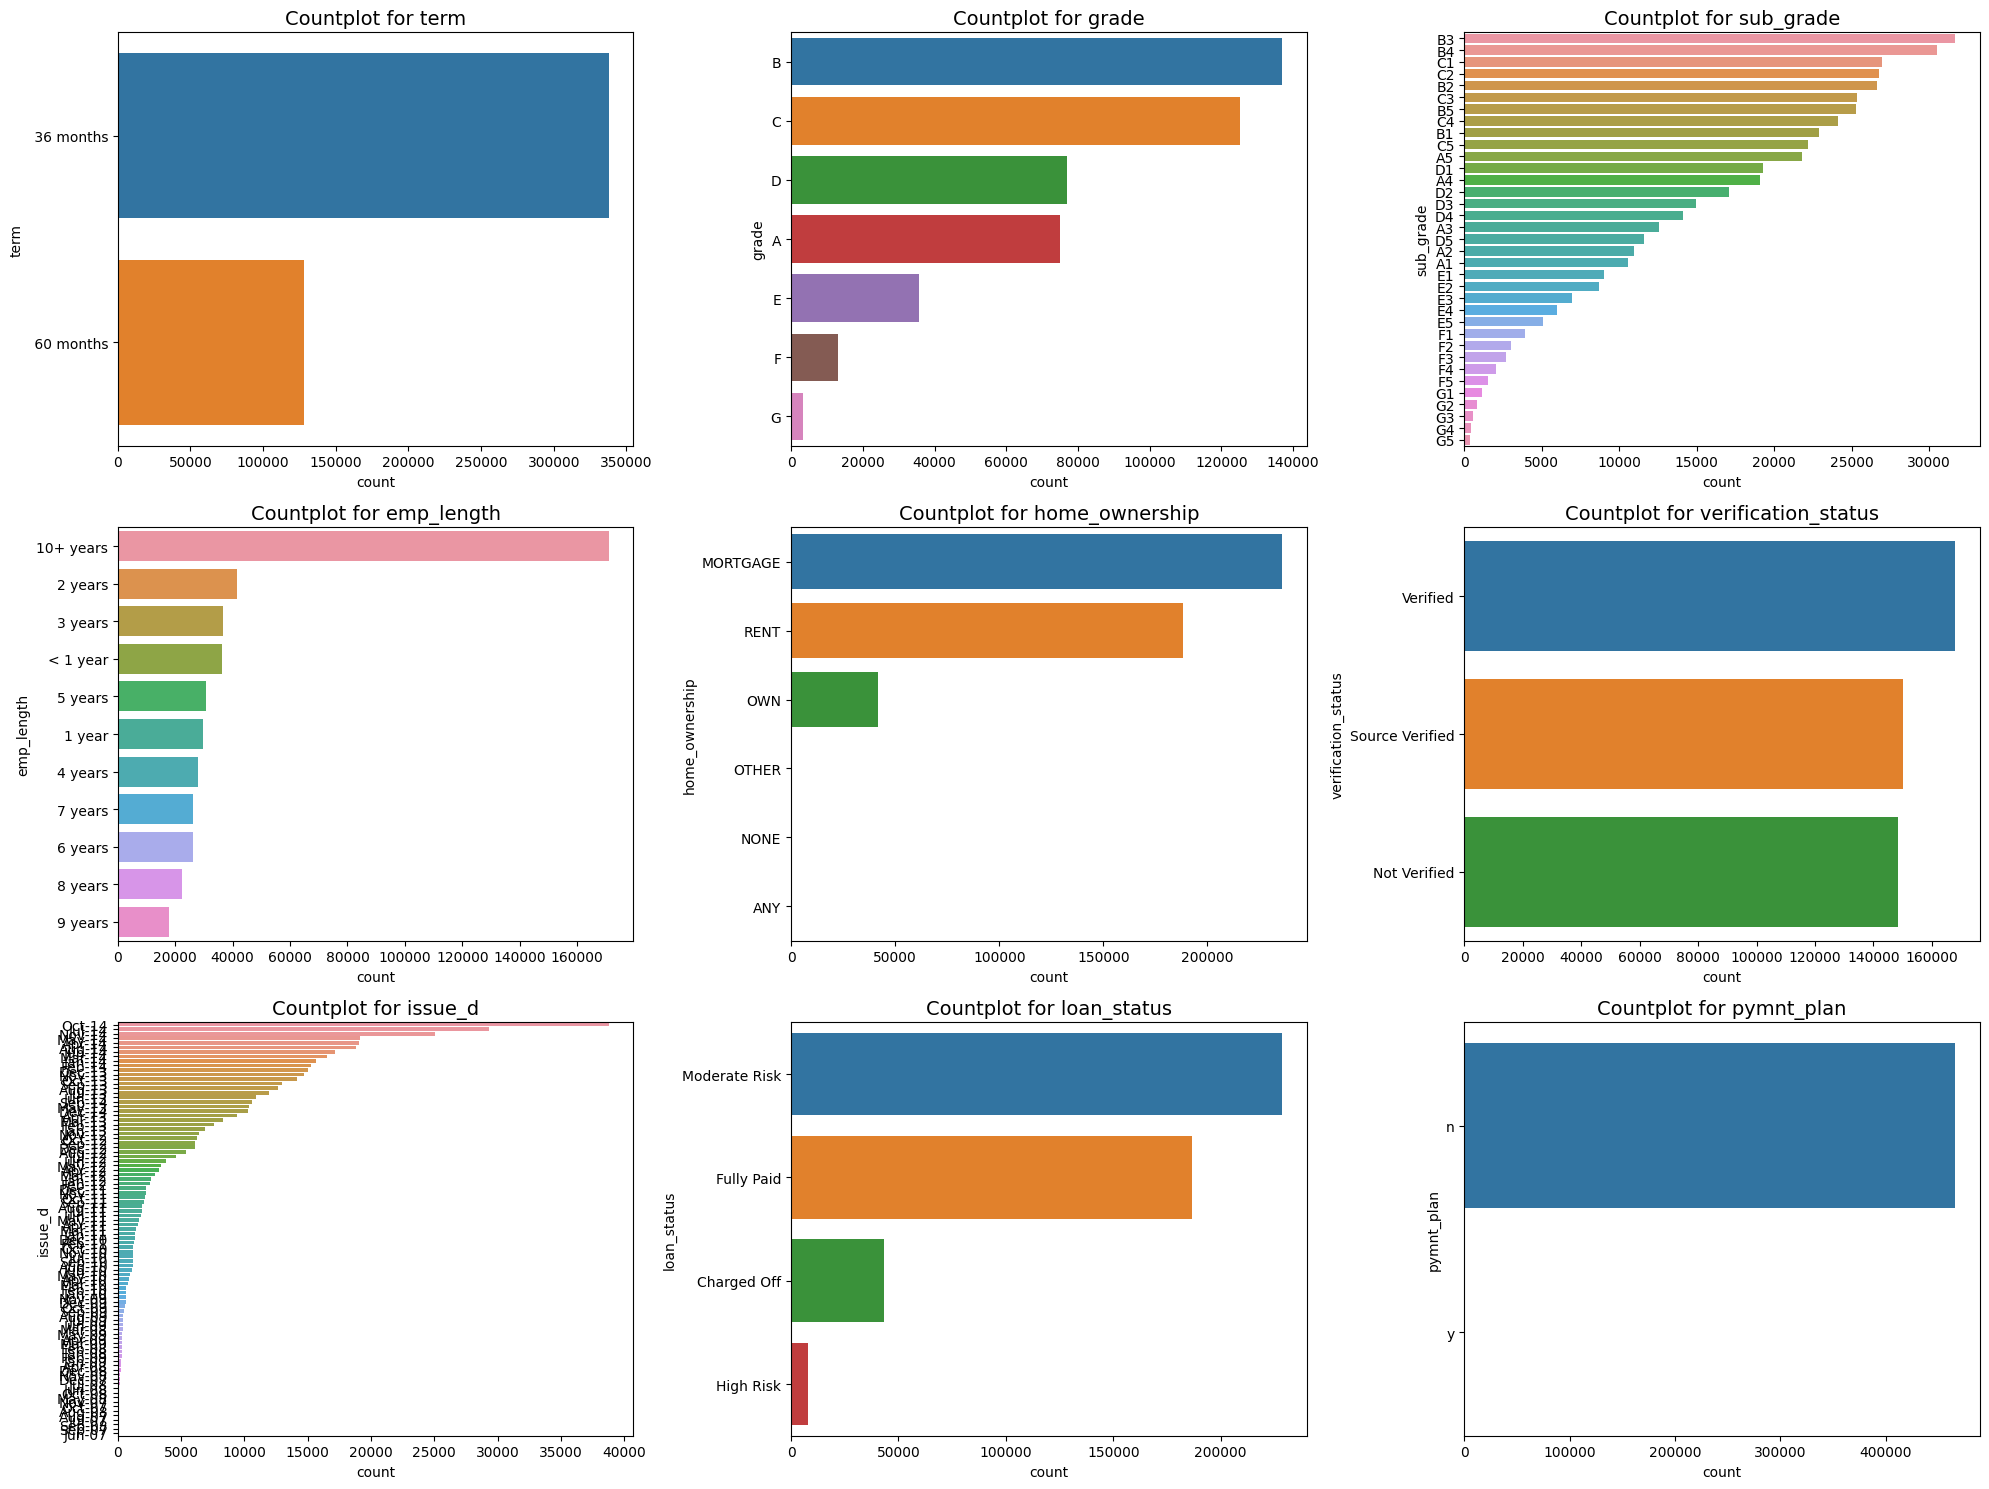

In [17]:
# Countplot for categorical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols[:9]):  # Visualize first 9 only
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f"Countplot for {col}", size=14)
plt.tight_layout()
plt.show()

Grafik countplot menghasilkan beberpa kesimpulan:
1. <b>Frekuensi Kategori</b>: Beberapa kategori dengan jumlah data yang dominan, seperti <b>loan_status</b> dengan kategori <b>Moderate Risk</b> dan <b>Fully Paid</b> yang paling banyak. Fitur <b>home_ownership</b> didominasi oleh kategori <b>MORTGAGE</b> dan <b>RENT</b>.<br>
2. <b>Pola distribusi kategori</b>: Beberapa kategori seperti <b>loan_status</b> dan <b>verification_status</b> menunjukkan distribusi yang tidak merata, di mana sebagian besar data cenderung berada pada beberapa kategori utama.<br>


<h3>2. Analisis Bivariat</h3>

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


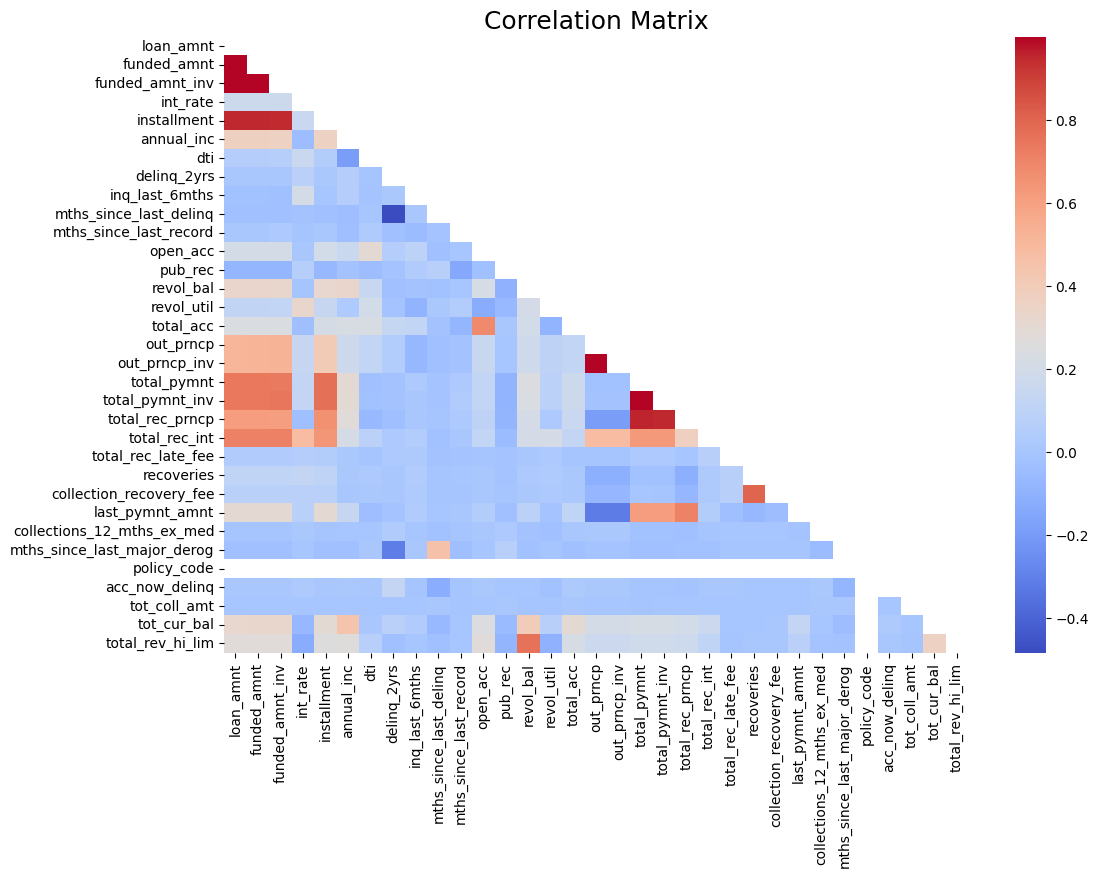

In [18]:
# Heatmap untuk korelasi numerik
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(correlation_matrix))
plt.title("Correlation Matrix", size=18)
plt.show()

Berdasarkan heatmap disimpulkan:
1. Fitur <b>loan_amnt</b> dan <b>funded_amnt</b> memiliki korelasi yang <b>sangat tinggi</b>, yang menunjukkan bahwa jumlah pinjaman dan jumlah dana yang disalurkan sangat terkait.<br>
2. Terdapat <b>korelasi negatif</b> yang signifikan antara <b>loan_amnt</b> dan <b>int_rate</b>, yang mengindikasikan bahwa peminjam dengan pinjaman lebih besar cenderung memiliki suku bunga yang lebih rendah.<br>

C:\Users\Asus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


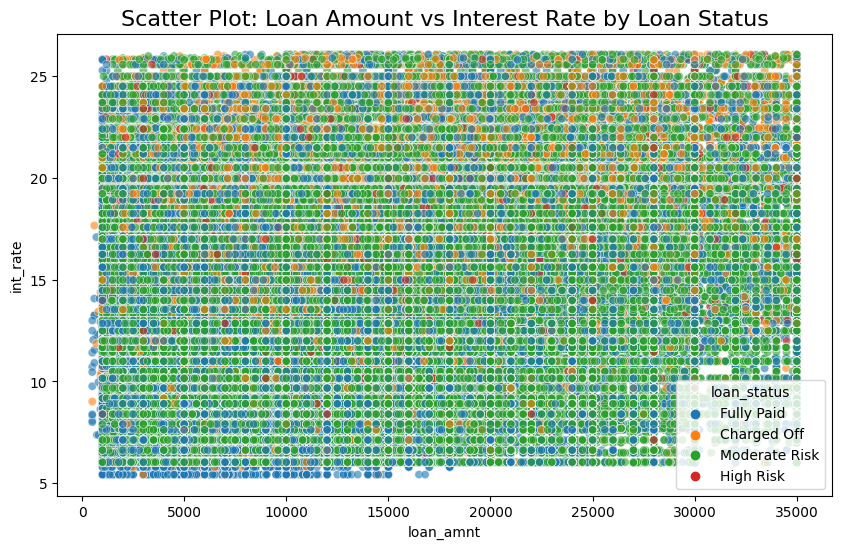

In [19]:
# Scatter plot untuk hubungan antara dua fitur numerik
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loan_amnt', y='int_rate', hue='loan_status', alpha=0.6)
plt.title("Scatter Plot: Loan Amount vs Interest Rate by Loan Status", size=16)
plt.show()

Grafik scatter menunjukkan:
1. Scatter plot menunjukkan bahwa pinjaman dengan pinjaman yang  yang lebih besar (<b>loan_amnt</b>) cenderung memiliki suku bunga (<b>int_rate</b>) yang lebih rendah, hal ini bisa jadi disebabkan oleh faktor risiko yang lebih rendah pada pinjaman besar.<br>
2.  Pinjaman yang dianggap <b>Fully Paid</b> cenderung lebih tersebar di area dengan jumlah pinjaman yang lebih rendah dan suku bunga yang lebih tinggi, sementara pinjaman dengan status <b>Charged Off</b> lebih banyak terdistribusi pada area dengan pinjaman besar dan suku bunga yang lebih rendah.<br>

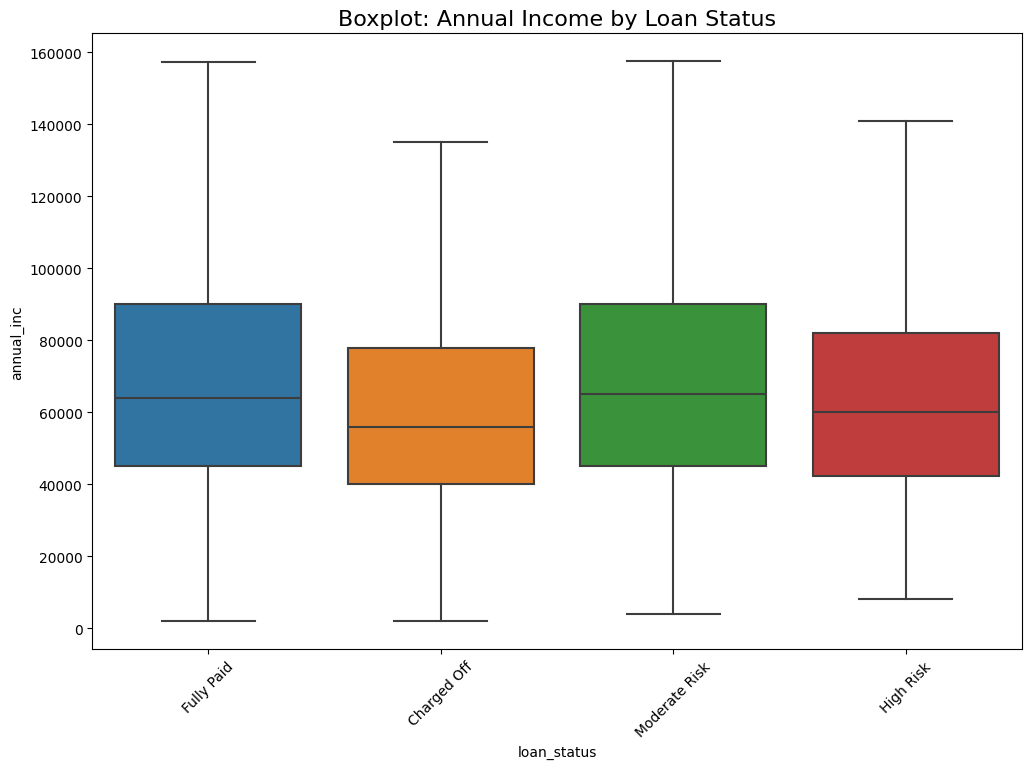

In [20]:
# Boxplot untuk analisis distribusi numerik berdasarkan kategori
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='loan_status', y='annual_inc', showfliers=False)
plt.title("Boxplot: Annual Income by Loan Status", size=16)
plt.xticks(rotation=45)
plt.show()

Berdasarkan grafik boxplot menunjukkan bahwa peminjam dengan status <b>Fully Paid</b> memiliki pendapatan tahunan (<b>annual_inc</b>) yang lebih tinggi dibandingkan dengan yang memiliki status <b>Charged Off</b> atau <b>Moderate Risk</b>. Ini menunjukkan bahwa peminjam dengan pendapatan lebih tinggi lebih cenderung untuk melunasi pinjaman mereka.<br>

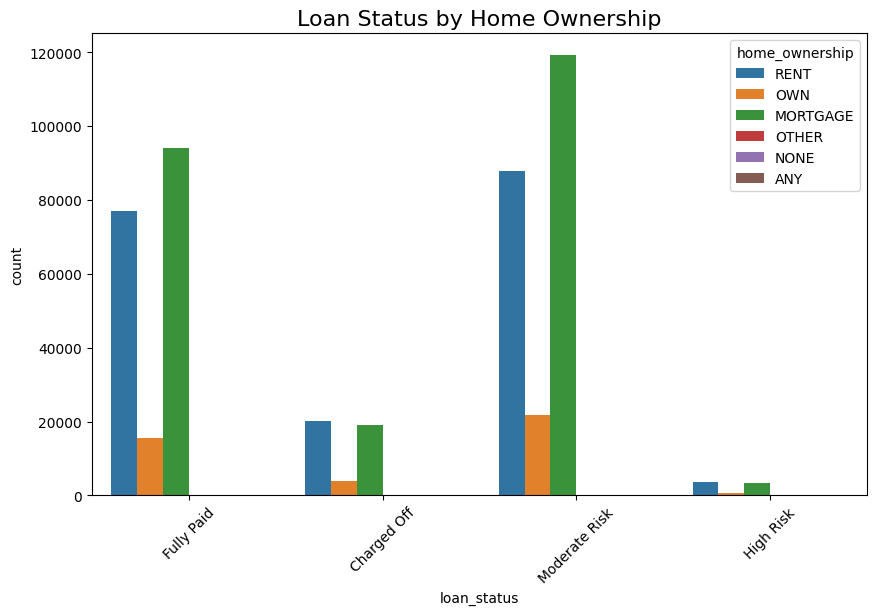

In [21]:
# Countplot untuk analisis kategori terhadap target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_status', hue='home_ownership')
plt.title("Loan Status by Home Ownership", size=16)
plt.xticks(rotation=45)
plt.show()

Grafik countplot menunjukkan bahwa peminjam dengan status <b>MORTGAGE</b> lebih banyak berada pada kategori <b>Moderate Risk</b> dan <b>Fully Paid</b>. Hal ini dapat menunjukkan bahwa peminjam yang memiliki rumah mungkin lebih stabil dalam membayar pinjaman mereka, atau bahwa lebih banyak peminjam dengan pinjaman rumah yang berisiko.<br>

<h2>Data Preparation</h2>

<h3>Kesatu - Handle Outlier</h3>
Handle outlier atau menangani outlier merupakan langkah penting dalam analisis data, terutama dalam konteks statistika dan machine learning. Outlier adalah titik data yang menyimpang jauh dari mayoritas data lainnya, dan dapat disebabkan oleh berbagai faktor seperti kesalahan pengukuran atau kondisi khusus yang memang berbeda dari data lain. Tujuan dari handle outlier adalah untuk Meningkatkan Akurasi Model, Mendeteksi Kesalahan Data, Menghindari Kesimpulan yang Menyesatkan dan Memastikan Kualitas Data. Pada masalah kali ini tidak dilakukan handle outlier karena data sudah mendekati normal skewness.<br>

<h3>Kedua - Label Encoding</h3>
Label encoding adalah teknik yang digunakan dalam pemrosesan data untuk mengonversi kategori data menjadi format numerik, yang diperlukan dalam banyak algoritma machine learning.

In [8]:
# Memeriksa apakah kolom 'loan_status' ada dalam DataFrame
if 'loan_status' in df.columns:
    # Membuat objek LabelEncoder
    label_encoder = LabelEncoder()

    # Melakukan encoding pada kolom 'loan_status'
    df['loan_status_encoded'] = label_encoder.fit_transform(df['loan_status'])

    # Melihat hasil encoding dan mapping
    print("Mapping Label Encoding:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
    print(df[['loan_status', 'loan_status_encoded']].head())
else:
    print("Kolom 'loan_status' tidak ditemukan dalam DataFrame.")

Mapping Label Encoding: {'Charged Off': 0, 'Fully Paid': 1, 'High Risk': 2, 'Moderate Risk': 3}
     loan_status  loan_status_encoded
0     Fully Paid                    1
1    Charged Off                    0
2     Fully Paid                    1
3     Fully Paid                    1
4  Moderate Risk                    3


<h3>Ketiga - Split Data</h3>
Split data adalah proses membagi dataset menjadi dua atau lebih subset, yang biasanya disebut training set dan test set. Tujuan utama dari pembagian ini adalah untuk melatih model pada satu bagian data (training set) dan menguji kinerjanya pada bagian lain yang tidak digunakan selama pelatihan (test set). Ini memastikan bahwa model dapat menggeneralisasi dengan baik dan tidak hanya bekerja baik pada data yang sudah pernah dilihat (overfitting). Pada kasus ini, <b>80%</b> data didistribusikan untuk <b>Data Latih</b>, sedangkan <b>20%</b> data digunakan untuk <b>Data Uji</b>

In [9]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['loan_status','loan_status_encoded','term',
                     'grade','sub_grade','home_ownership',
                     'verification_status','issue_d',
                     'pymnt_plan','purpose','addr_state',
                     'earliest_cr_line','initial_list_status','last_credit_pull_d',
                     'application_type','emp_length','last_pymnt_d',
                    'last_credit_pull_d'])  # Semua kolom kecuali target
y = df['loan_status_encoded']                 # Target atau label

# Bagi data menjadi training set dan testing set (contoh: 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Informasi setelah split
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

# Distribusi target di training dan testing set
print("Distribusi target di training set:\n", y_train.value_counts(normalize=True))
print("Distribusi target di testing set:\n", y_test.value_counts(normalize=True))

Jumlah data training: 373028
Jumlah data testing: 93257
Distribusi target di training set:
 loan_status_encoded
3    0.490237
1    0.400458
0    0.092725
2    0.016581
Name: proportion, dtype: float64
Distribusi target di testing set:
 loan_status_encoded
3    0.490237
1    0.400453
0    0.092722
2    0.016589
Name: proportion, dtype: float64


<h2>Data Modelling</h2>

<h2>Kesatu - Pelatihan Model</h2>
Model machine learning adalah suatu algoritma atau sistem statistik yang dirancang untuk belajar dari data dan membuat prediksi atau keputusan tanpa intervensi manusia yang langsung. Pada analisis yang digunakan adalah model <b>Supervised Learning</b> dengan algoritma:<br>
1. Logistic Regression<br>
2. Decision Tree<br>
3. Random Forest<br>
4. XGBoost<br>

Dalam konteks evaluasi model klasifikasi, terutama untuk masalah seperti memprediksi status pinjaman (loan status), istilah True Positive (TP), True Negative (TN), False Positive (FP), dan False Negative (FN) adalah beberapa metrik kunci yang digunakan dalam pengukuran kinerja model. Mari kita bahas hubungan antara TP, TN, FP, FN dan metrik evaluasi yang relevan dalam pengaturan ini:

<b>Definisi Istilah</b>
1. <b>True Positive (TP)</b>: Jumlah kasus di mana model memprediksi bahwa status pinjaman adalah "baik" (atau tidak bermasalah), dan ternyata benar "baik" (positif sebenarnya).
2. <b>True Negative (TN)</b>: Jumlah kasus di mana model memprediksi bahwa status pinjaman adalah "buruk" (atau bermasalah), dan ternyata benar "buruk" (negatif sebenarnya).
3. <b>False Positive (FP)</b>: Jumlah kasus di mana model memprediksi bahwa status pinjaman adalah "baik", tetapi ternyata benar "buruk" (salah prediksi positif).
4. <b>False Negative (FN)</b>: Jumlah kasus di mana model memprediksi bahwa status pinjaman adalah "buruk", tetapi ternyata benar "baik" (salah prediksi negatif).<br>

<b>Hubungan dengan Metrik Evaluasi</b><br>
Berdasarkan istilah di atas, kita dapat menghitung beberapa metrik evaluasi yang penting, antara lain:
1. Accuracy: Proporsi total prediksi yang benar (baik positif maupun negatif).<br>Accuracy = {TP + TN}/{TP + TN + FP + FN}
2. Precision: Proporsi prediksi positif yang benar (seberapa banyak dari yang diprediksi baik, yang benar-benar baik).<br>Precision = {TP}/{TP + FP}
3. Recall (Sensitivity): Proporsi kasus positif yang terdeteksi dengan benar oleh model (seberapa banyak dari yang benar-benar baik, yang dapat diprediksi sebagai baik).<br>Recall = {TP}/{TP + FN}
4. F1 Score: Harmonik rata-rata dari precision dan recall. Ini memberikan penekanan pada keseimbangan antara kedua metrik ini.<br>F1 Score = 2 x {Precision + Recall}/{Precision + Recall}
5. ROC-AUC: Metrik yang menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif. Area di bawah kurva ROC menggambarkan trade-off antara true positive rate (recall) dan false positive rate (FP / (FP + TN)).

<b>Interpretasi dalam Konteks Loan Status</b><br>
- TP dan TN memberikan gambaran tentang seberapa baik model dalam mengidentifikasi status pinjaman yang "baik" dan "buruk".
- FP dapat memberi tahu kita tentang risiko kesalahan prediksi positif, yang berarti model mungkin memberikan pinjaman kepada individu yang mungkin tidak dapat membayar.
- FN menunjukkan jumlah kasus di mana seharusnya model memperingatkan status buruk, tapi salah prediksi sebagai baik, berisiko menyebabkan kerugian bagi pemberi pinjaman.

<h3>1. Logistic Regression</h3>

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Instantiate the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)

# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Import metrik evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Hitung metrik evaluasi
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='macro')  # Menggunakan average 'macro'
recall_logreg = recall_score(y_test, y_pred_logreg, average='macro')        # Menggunakan average 'macro'
f1_logreg = f1_score(y_test, y_pred_logreg, average='macro')                # Menggunakan average 'macro'
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# Menghitung ROC AUC hanya untuk multiclass dengan average='macro'
# Jika klasifikasi multiklas, kita harus menghitung ROC AUC secara spesifik
roc_auc_logreg = roc_auc_score(y_test, logreg.predict_proba(X_test), multi_class='ovr')  # Menggunakan multi_class='ovr'

<h3>2. Decision Tree</h3>

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Instantiate the model
dtree = DecisionTreeClassifier(random_state=42)

# Train the model
dtree.fit(X_train, y_train)

# Make predictions
y_pred_dtree = dtree.predict(X_test)

# Accuracy
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)

In [27]:
# Hitung metrik evaluasi
accuracy_dt = accuracy_score(y_test, y_pred_dtree)
precision_dt = precision_score(y_test, y_pred_dtree, average='macro')  # Gunakan average='macro' untuk multiclass
recall_dt = recall_score(y_test, y_pred_dtree, average='macro')        # Gunakan average='macro' untuk multiclass
f1_dt = f1_score(y_test, y_pred_dtree, average='macro')                # Gunakan average='macro' untuk multiclass
cm_dt = confusion_matrix(y_test, y_pred_dtree)

# Hitung ROC AUC
roc_auc_dt = roc_auc_score(y_test, dtree.predict_proba(X_test), multi_class='ovr') # Gunakan multi_class='ovr' untuk multiclass

<h3>3. Random Forest</h3>

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Instantiate the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [29]:
# Hitung metrik evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')  # Gunakan average='macro' untuk multiclass
recall_rf = recall_score(y_test, y_pred_rf, average='macro')        # Gunakan average='macro' untuk multiclass
f1_rf = f1_score(y_test, y_pred_rf, average='macro')                # Gunakan average='macro' untuk multiclass
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Hitung ROC AUC
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')  # Gunakan multi_class='ovr'

<h3>4. XGBoost</h3>

In [30]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Instantiate the model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

In [31]:
# Hitung metrik evaluasi
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')  # Average macro untuk multiclass
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')        # Average macro untuk multiclass
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')                # Average macro untuk multiclass
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Hitung ROC AUC
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr')  # Multi-class

<h2>Kedua - Evaluasi Hasil Modeling</h2>

In [32]:
df_evaluasi = pd.DataFrame({
    'Model' : ['Logistic Regression','Decision Tree',
               'Random Forest','XGBoost'],
    'Akurasi' : [accuracy_logreg,accuracy_dt,
                 accuracy_rf, accuracy_xgb],
    'Precision' : [precision_logreg,precision_dt,
                   precision_rf,precision_xgb],
    'Recall' : [recall_logreg,recall_dt,
                recall_rf,recall_xgb],
    'F1 Score' : [f1_logreg,f1_dt,
                  f1_rf,f1_xgb],
    'roc_auc' : [roc_auc_logreg,roc_auc_dt,
                roc_auc_rf,roc_auc_xgb]
})
df_evaluasi.round(4)

,Model,Akurasi,Precision,Recall,F1 Score,roc_auc
0,Logistic Regression,0.9806,0.7401,0.7457,0.7428,0.9456
1,Decision Tree,0.9710,0.7918,0.7975,0.7944,0.8935
2,Random Forest,0.9845,0.9762,0.7806,0.8027,0.9606
3,XGBoost,0.9842,0.9508,0.7904,0.8155,0.9701


Berdasarkan evaluasi hasil model dapat disimpulkan:<br>
1. <b>Akurasi</b>:
   - <b>Random Forest</b> (98.45%) dan <b>XGBoost</b> (98.42%) memiliki akurasi tertinggi, menunjukkan bahwa kedua model ini mampu memprediksi dengan benar pada sebagian besar data pengujian.
   - <b>Logistic Regression</b> (98.06%) dan <b>Decision Tree</b> (97.10%) memiliki akurasi lebih rendah dibandingkan Random Forest dan XGBoost.<br>
2. <b>Precision</b>:
   - <b>Random Forest</b> memiliki nilai precision tertinggi (97.62%), diikuti oleh <b>XGBoost</b> (95.08%).
   - Precision tinggi berarti model ini sangat baik dalam meminimalkan <b>false positives</b>, yang penting jika salah memprediksi memiliki dampak besar (misalnya, memberi pinjaman kepada pelanggan yang berisiko tinggi).<br>
3. <b>Recall</b>:
   - <b>Decision Tree</b> (79.75%) dan <b>XGBoost</b> (79.04%) menunjukkan performa yang baik dalam mengidentifikasi kelas yang benar, terutama untuk mendeteksi kasus yang jarang terjadi.
   - <b>Logistic Regression</b> memiliki recall lebih rendah (74.57%).<br>
4. <b>F1 Score</b>:
   - <b>XGBoost</b> memiliki F1-score tertinggi (81.55%), menunjukkan keseimbangan antara precision dan recall.
   - <b>Random Forest</b> mendekati dengan F1-score sebesar 80.27%, sedangkan Decision Tree dan Logistic Regression memiliki performa lebih rendah.<br>
5. <b>ROC-AUC</b>:
   - <b>XGBoost</b> memiliki nilai ROC-AUC tertinggi (0.9701), menunjukkan kemampuan terbaik dalam membedakan antara kelas positif dan negatif di semua ambang batas.
   - <b>Random Forest</b> (0.9606) juga sangat kompetitif, sedangkan Logistic Regression dan Decision Tree memiliki nilai ROC-AUC lebih rendah.

<h2>Ketiga - Menyesuaikan Parameter Model Menggunakan Teknik Cross-Validation</h2>
Cross-validation adalah metode untuk mengevaluasi kinerja model dengan membaginya menjadi beberapa fold (misalnya 5-fold atau 10-fold), kemudian model dilatih dan diuji di setiap fold.<br

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score

# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Scoring metric
scorer = make_scorer(f1_score, average='weighted')  # Weighted F1-score

# Cross-validation untuk setiap model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    cv_scores = cross_val_score(model, X, y, cv=5, scoring=scorer)  # 5-fold CV
    print(f"{model_name} F1-Score: Mean = {cv_scores.mean():.4f}, Std = {cv_scores.std():.4f}")
    print("-" * 50)

Evaluating Logistic Regression...


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Logistic Regression F1-Score: Mean = 0.9728, Std = 0.0012
--------------------------------------------------
Evaluating Decision Tree...
Decision Tree F1-Score: Mean = 0.9468, Std = 0.0072
--------------------------------------------------
Evaluating Random Forest...
Random Forest F1-Score: Mean = 0.9748, Std = 0.0017
--------------------------------------------------
Evaluating XGBoost...


C:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:45:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:46:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Asus\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:46:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Asus\anaconda3\Lib\site-packages\xgbo

XGBoost F1-Score: Mean = 0.9671, Std = 0.0120
--------------------------------------------------


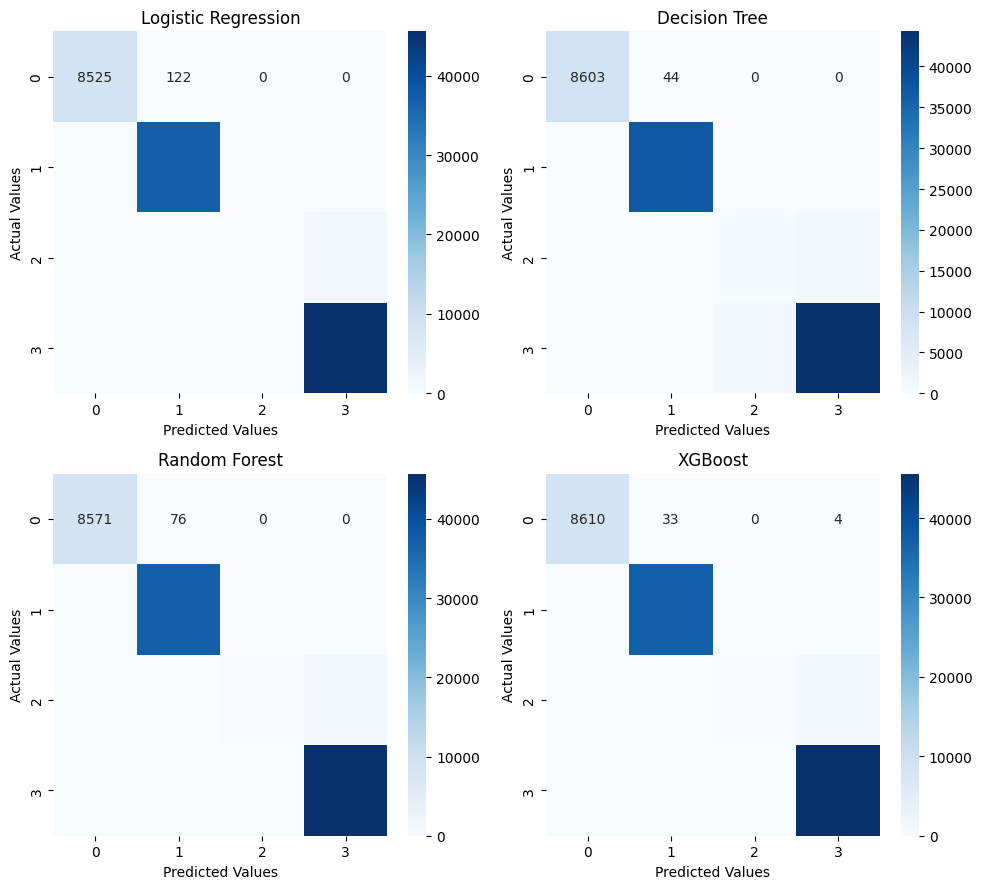

In [34]:
cm_list = [cm_logreg, cm_dt, cm_rf, cm_xgb]
model_names = ['Logistic Regression', 'Decision Tree',
               'Random Forest','XGBoost']
fig, axes = plt.subplots(2, 2, figsize=(10, 9))
for i in range(len(cm_list)):
    row = i // 2
    col = i % 2
    sns.heatmap(cm_list[i], annot=True, cmap='Blues', fmt='g', ax=axes[row, col])
    axes[row, col].set_title(model_names[i])
    axes[row, col].set_ylabel('Actual Values')
    axes[row, col].set_xlabel('Predicted Values')

plt.tight_layout()
plt.show()

<h2>Keempat - Tuning Hyperparameter</h2>

Tuning hyperparameter adalah proses penyesuaian nilai-nilai parameter yang ditentukan sebelum pelatihan model, dengan tujuan untuk mendapatkan kinerja model yang optimal. Metode yang digunakan adalah Grid Search. Grid Search mendefinisikan berbagai kombinasi nilai hyperparameter dalam bentuk grid. Selain itu, dapat melatih model untuk setiap kombinasi dan memilih model dengan kinerja terbaik. Terakhir, metode ini sangat efektif tetapi bisa memakan waktu jika ruang pencarian parameter sangat luas.

<h3>1. Random Forest</h3>

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid = GridSearchCV(rf, param_grid, cv=15)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Ran

<h3>2. XGBoost</h3>

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1]
}
grid = GridSearchCV(gxb_model, param_grid, cv=15)
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)